# **Step 1 Install and Import  Libraries**

In [5]:
!pip install pybullet

In [6]:
import pybullet as p
import pybullet_data
import matplotlib.pyplot as plt

# Start PyBullet in "DIRECT" mode (no GUI)
physicsClient = p.connect(p.DIRECT)
p.setAdditionalSearchPath(pybullet_data.getDataPath())

# **Step 2: Build the Virtual Scene**

In [10]:
import pybullet as p
import pybullet_data
import matplotlib.pyplot as plt

# Initialize PyBullet
p.connect(p.DIRECT)
p.setAdditionalSearchPath(pybullet_data.getDataPath())

# Load ground plane
p.loadURDF("plane.urdf")

# Load custom URDFs with positions (x, y, z)
objects = [
    p.loadURDF("/content/table.urdf", [0, 0, 0]),          # Center
    p.loadURDF("/content/pillar.urdf", [2, 1, 0]),         # Right side
    p.loadURDF("/content/pillar.urdf", [-2, -1, 0]),       # Left side
    p.loadURDF("/content/wall.urdf", [0, 3, 0]),           # Back wall
    p.loadURDF("/content/wall.urdf", [0, -3, 0]),          # Front wall
    p.loadURDF("/content/ball.urdf", [1.5, 0, 0.3]),       # Right of table
    p.loadURDF("/content/ball.urdf", [-1.5, 0, 0.3])       # Left of table
]

# **Step 3: Configure Camera Views**

In [11]:
def get_camera_image(camera_pos, target_pos):
    # Camera configuration
    view_matrix = p.computeViewMatrix(
        cameraEyePosition=camera_pos,
        cameraTargetPosition=target_pos,
        cameraUpVector=[0, 0, 1]
    )
    proj_matrix = p.computeProjectionMatrixFOV(
        fov=60, aspect=1.0, nearVal=0.1, farVal=10.0
    )

    # Capture image
    _, _, rgb, _, _ = p.getCameraImage(
        width=640,
        height=480,
        viewMatrix=view_matrix,
        projectionMatrix=proj_matrix,
        renderer=p.ER_BULLET_HARDWARE_OPENGL
    )
    return rgb

# Capture from 3 angles
img1 = get_camera_image([5, 0, 3], [0, 0, 0])    # Front-right view
img2 = get_camera_image([0, 5, 3], [0, 0, 0])    # Top view
img3 = get_camera_image([-5, 0, 3], [0, 0, 0])   # Front-left view

# **Step 4: Display Images**

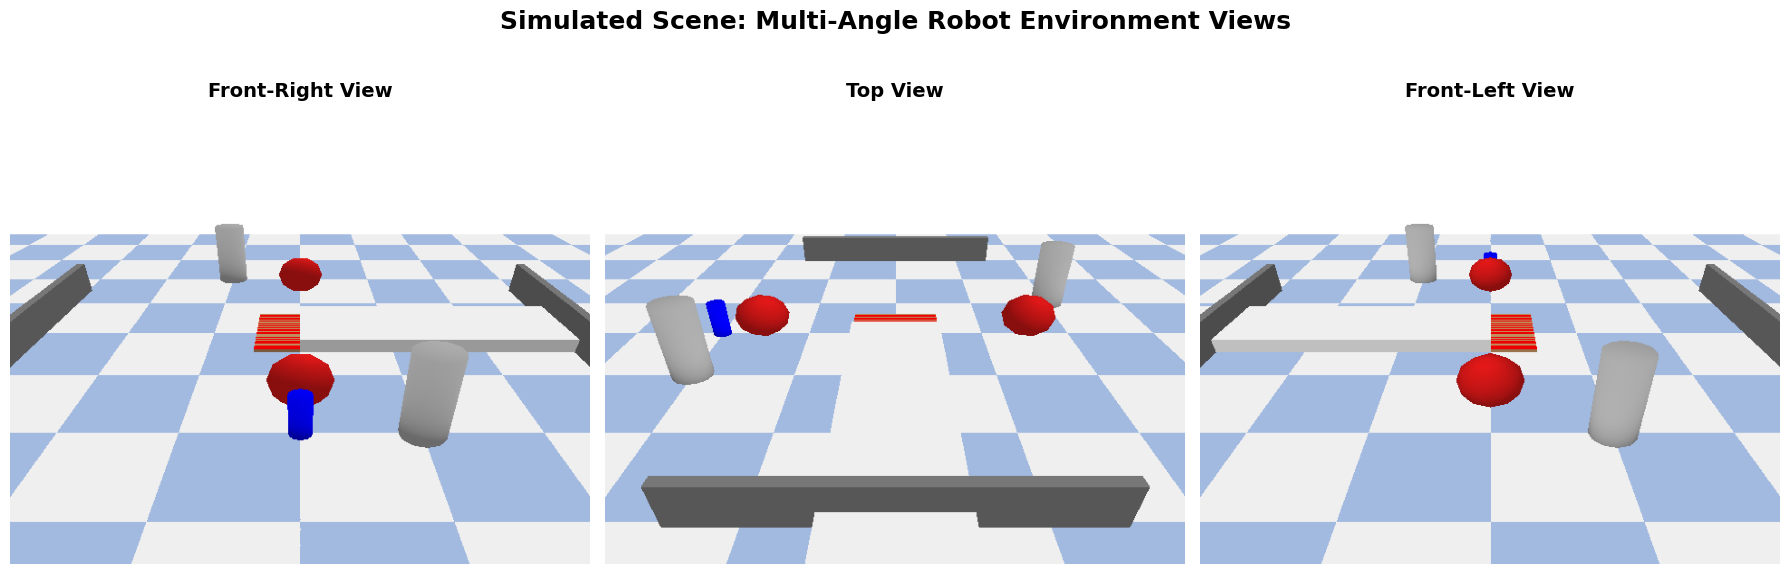

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure images are in RGB format if needed (skip if already RGB)
img1_rgb = img1[:, :, :3]
img2_rgb = img2[:, :, :3]
img3_rgb = img3[:, :, :3]

# Create figure with professional formatting
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Simulated Scene: Multi-Angle Robot Environment Views", fontsize=18, weight='bold')

# Define image data and titles
images = [img1_rgb, img2_rgb, img3_rgb]
titles = ["Front-Right View", "Top View", "Front-Left View"]

for ax, img, title in zip(axs, images, titles):
    ax.imshow(img)
    ax.set_title(title, fontsize=14, fontweight='semibold')
    ax.axis('off')
    ax.set_aspect('auto')  # or 'equal' for square pixels

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Leave space for the suptitle
plt.show()
